In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from funciones import *

plt.style.use('figs.mplstyle')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': [10, 6]
})


housing = fetch_california_housing()


X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)



print("Características del dataset:")
print("\nMedInc: Ingreso medio del bloque (en decenas de miles)")
print("HouseAge: Edad media de las casas en el bloque")
print("AveRooms: Número promedio de habitaciones por hogar")
print("AveBedrms: Número promedio de dormitorios por hogar")
print("Population: Población del bloque")
print("AveOccup: Número promedio de ocupantes por hogar")
print("Latitude: Latitud del bloque")
print("Longitude: Longitud del bloque")
print("\nVariable objetivo:")
print("MedHouseVal: Valor medio de las casas (en centenas de miles)")

print("\nDimensiones del dataset:") 
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")

print("\nEstadísticas de las características:")
print(X.describe())
print("\nEstadísticas del valor objetivo:")
print(y.describe())

Características del dataset:

MedInc: Ingreso medio del bloque (en decenas de miles)
HouseAge: Edad media de las casas en el bloque
AveRooms: Número promedio de habitaciones por hogar
AveBedrms: Número promedio de dormitorios por hogar
Population: Población del bloque
AveOccup: Número promedio de ocupantes por hogar
Latitude: Latitud del bloque
Longitude: Longitud del bloque

Variable objetivo:
MedHouseVal: Valor medio de las casas (en centenas de miles)

Dimensiones del dataset:
Número de muestras: 20640
Número de características: 8

Estadísticas de las características:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.

# Estratificación de los datos

Distribución de precios en quintiles:

Con estratificación:
Train: [0.2174782  0.38148014 0.22020349 0.09665698 0.0841812 ]
Test: [0.27349806 0.35876938 0.19646318 0.09229651 0.07897287]

Sin estratificación:
Train: [0.21711483 0.38039002 0.22123304 0.09744428 0.08381783]
Test: [0.21899225 0.38493217 0.22165698 0.09253876 0.08187984]


/tmp/ipykernel_176533/4082763774.py:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


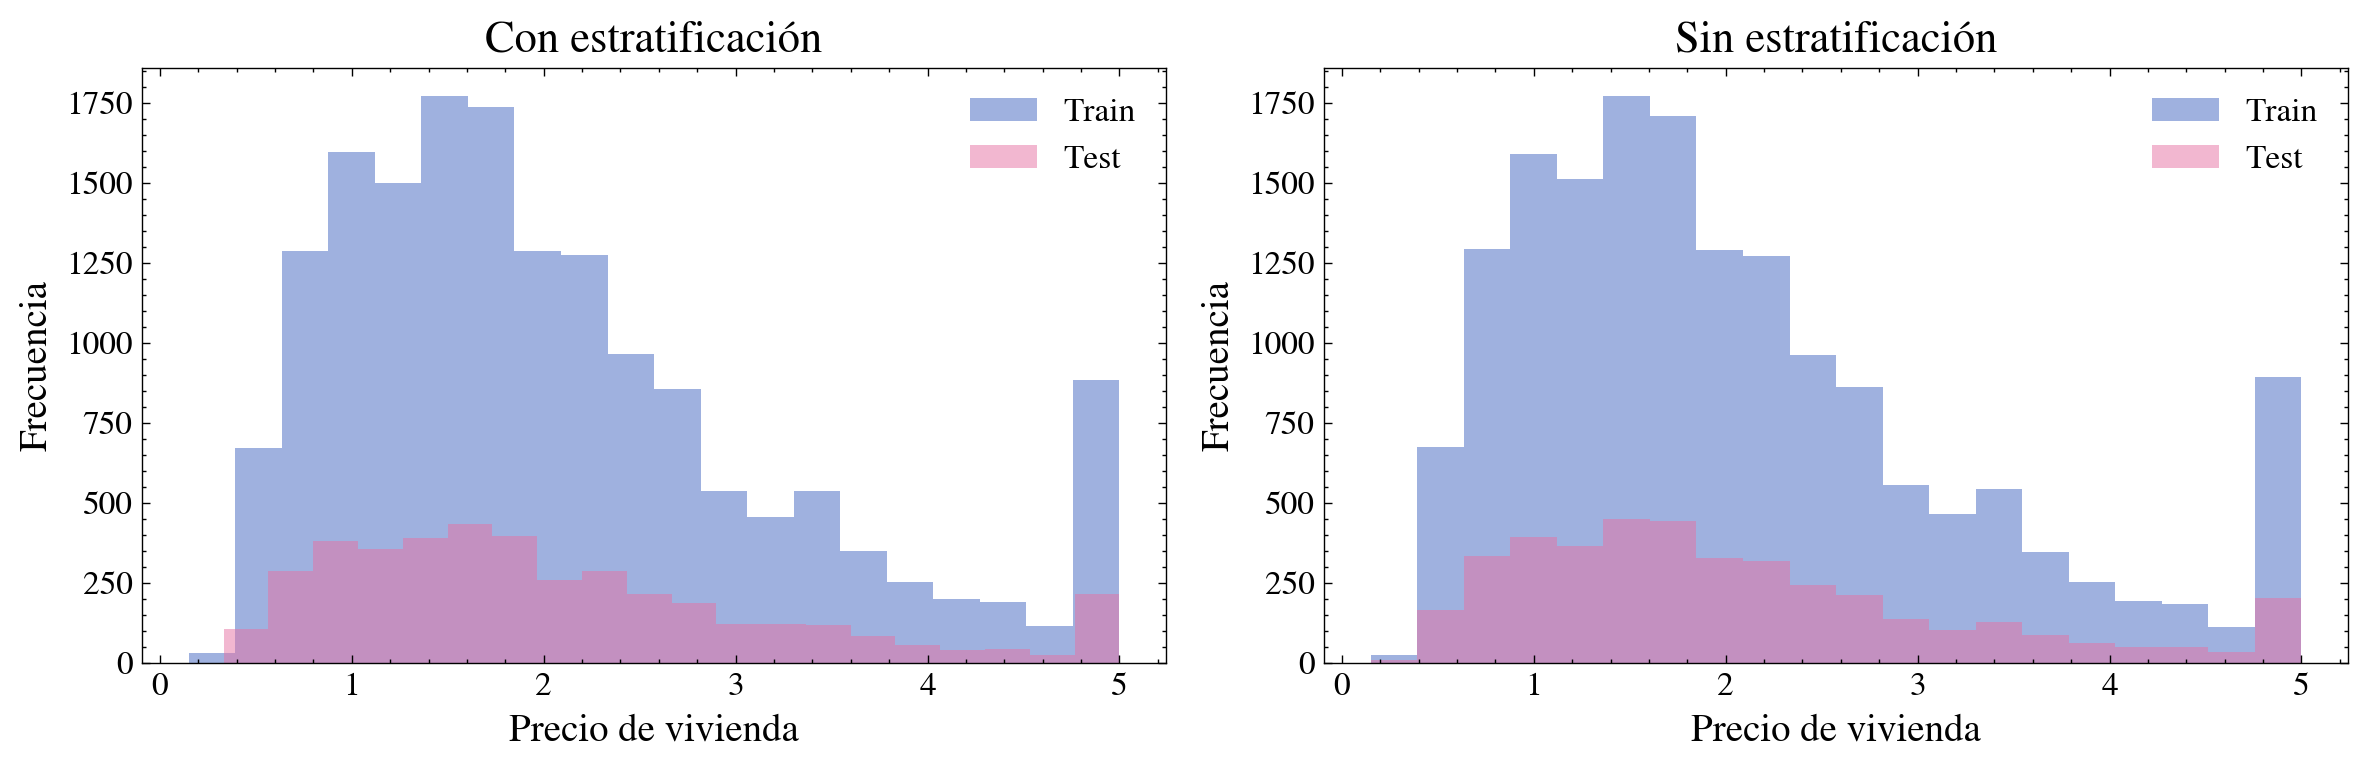

In [6]:
# Crear bins para estratificación
y_bins = pd.qcut(y, q=5, labels=False)


X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_bins
)

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Distribución de precios en quintiles:")
print("\nCon estratificación:")
print("Train:", np.histogram(y_train_strat, bins=5)[0]/len(y_train_strat))
print("Test:", np.histogram(y_test_strat, bins=5)[0]/len(y_test_strat))

print("\nSin estratificación:")
print("Train:", np.histogram(y_train_simple, bins=5)[0]/len(y_train_simple))
print("Test:", np.histogram(y_test_simple, bins=5)[0]/len(y_test_simple))

import seaborn as sns


plt.figure(figsize=(12, 4))

# Con estratificación
plt.subplot(121)
plt.hist(y_train_strat, bins=20, alpha=0.5, label='Train')
plt.hist(y_test_strat, bins=20, alpha=0.5, label='Test')
plt.title('Con estratificación')
plt.xlabel('Precio de vivienda')
plt.ylabel('Frecuencia')
plt.legend()

# Sin estratificación
plt.subplot(122)
plt.hist(y_train_simple, bins=20, alpha=0.5, label='Train')
plt.hist(y_test_simple, bins=20, alpha=0.5, label='Test')
plt.title('Sin estratificación')
plt.xlabel('Precio de vivienda')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.savefig('../Figures/Estratificacion.png')
plt.show()

# Estandarización

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y_bins
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # usando parámetros del train

X_train_scaled = pd.DataFrame(X_train_scaled, columns=housing.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=housing.feature_names)

print("\nEstadísticas del conjunto de entrenamiento estandarizado:")
print("\nMedia de cada característica:")
print(X_train_scaled.mean())
print("\nDesviación estándar de cada característica:")
print(X_train_scaled.std())

# Agregamos la columna de 1's para el b 
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

print("\nDimensiones finales:")
print(f"X_train: {X_train_scaled.shape}")
print(f"X_test: {X_test_scaled.shape}")


Estadísticas del conjunto de entrenamiento estandarizado:

Media de cada característica:
MedInc        3.032404e-16
HouseAge      1.624454e-17
AveRooms      1.399613e-16
AveBedrms     2.911108e-16
Population    3.614680e-17
AveOccup      3.334972e-17
Latitude     -1.278316e-16
Longitude     1.582148e-15
dtype: float64

Desviación estándar de cada característica:
MedInc        1.00003
HouseAge      1.00003
AveRooms      1.00003
AveBedrms     1.00003
Population    1.00003
AveOccup      1.00003
Latitude      1.00003
Longitude     1.00003
dtype: float64

Dimensiones finales:
X_train: (16512, 9)
X_test: (4128, 9)


# Modelos

Resultados con w óptimo:
ECM en training: 0.519372
ECM en test: 0.551437


/tmp/ipykernel_176533/206230233.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


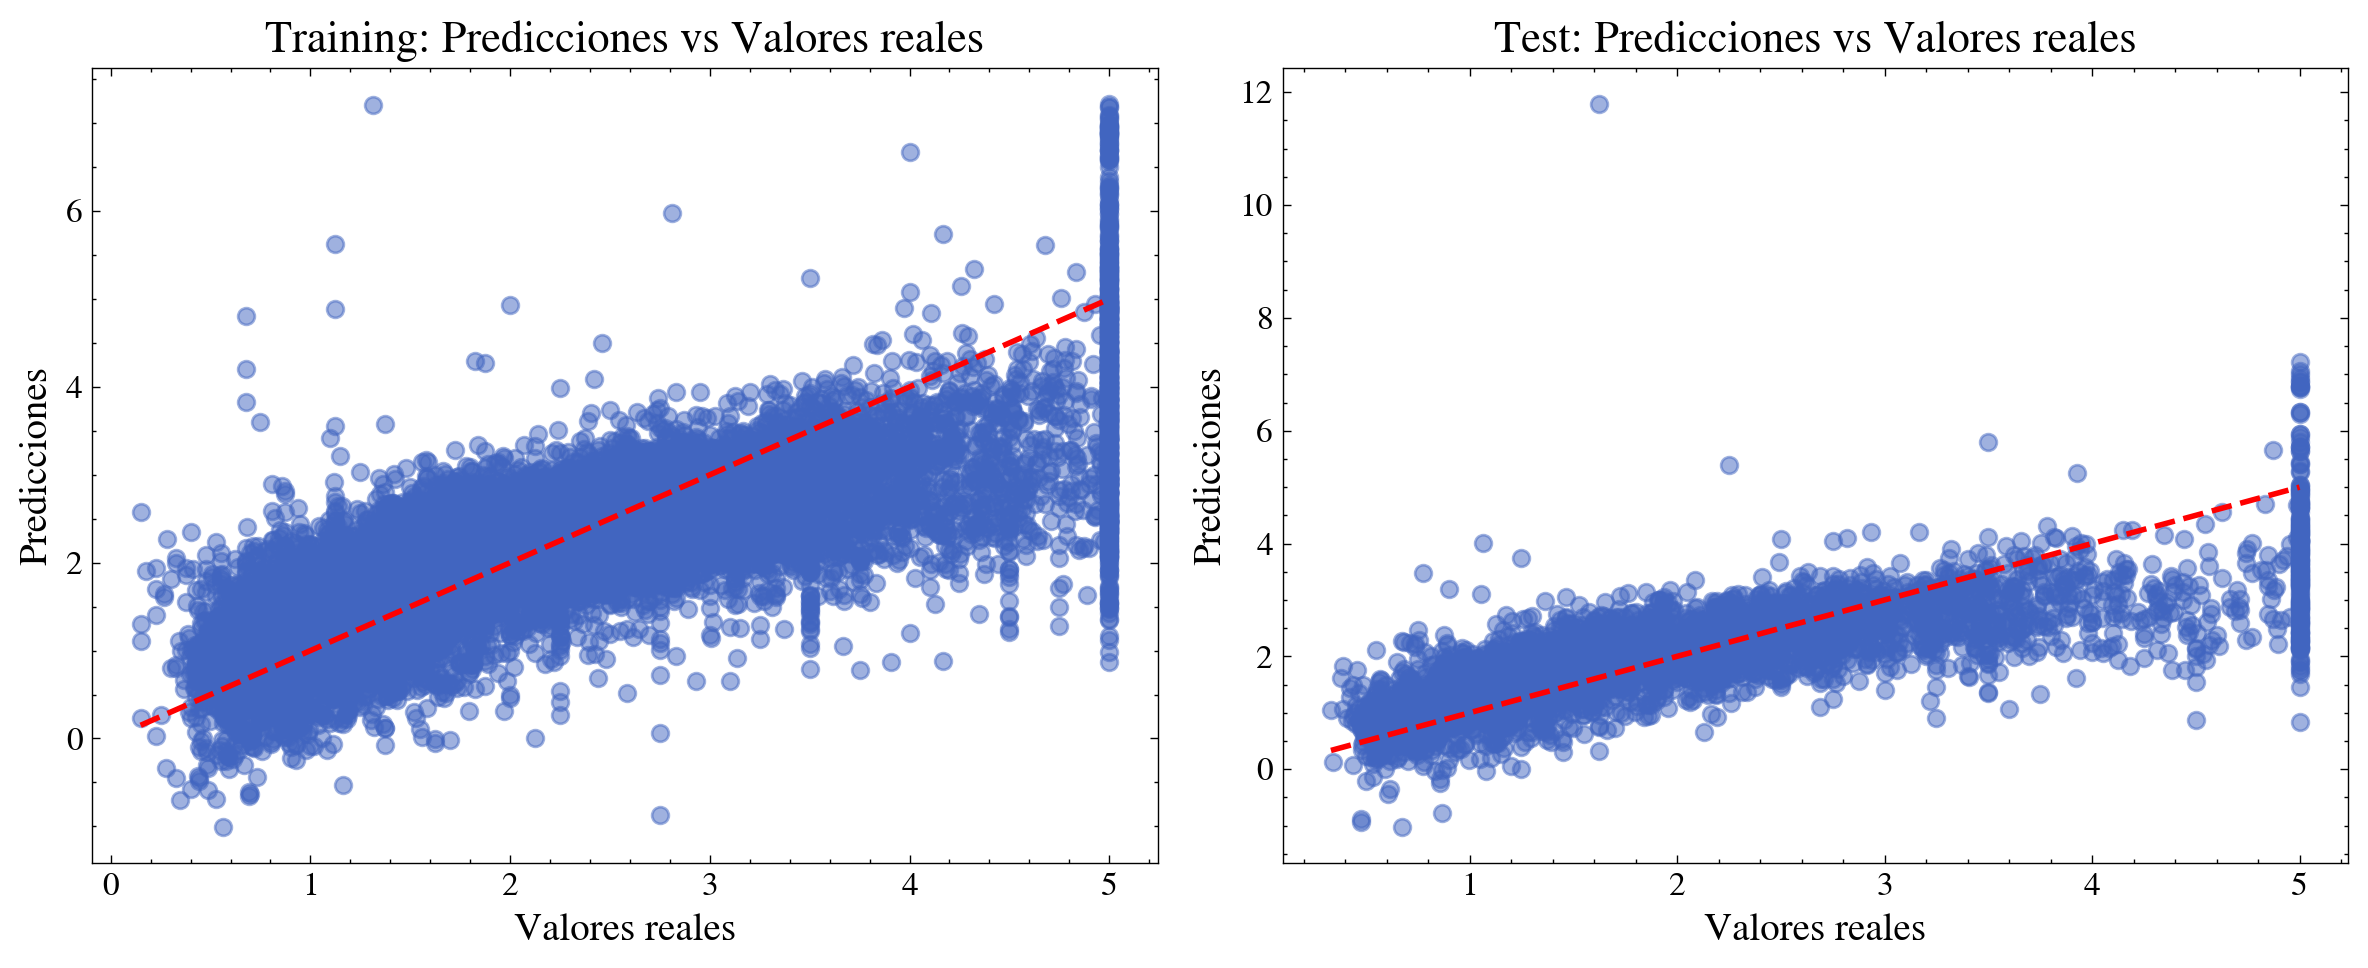


Coeficientes del modelo:
bias: 2.0698
MedInc: 0.8449
HouseAge: 0.1223
AveRooms: -0.2785
AveBedrms: 0.3305
Population: -0.0040
AveOccup: -0.0418
Latitude: -0.8993
Longitude: -0.8711


In [8]:
w_opt = wOptimo(X_train_scaled, y_train)

y_pred_train = X_train_scaled.dot(w_opt)
y_pred_test = X_test_scaled.dot(w_opt)

mse_train = mse(y_train, y_pred_train)
mse_test = mse(y_test, y_pred_test)

print("Resultados con w óptimo:")
print(f"ECM en training: {mse_train:.6f}")
print(f"ECM en test: {mse_test:.6f}")

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Training: Predicciones vs Valores reales')

plt.subplot(122)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Test: Predicciones vs Valores reales')

plt.tight_layout()
plt.savefig('../Figures/predicciones.png')
plt.show()

print("\nCoeficientes del modelo:")
feature_names = ['bias'] + list(housing.feature_names)
for name, coef in zip(feature_names, w_opt):
    print(f"{name}: {coef:.4f}")

# Solución con Gradiente Descendente

In [9]:
sigma_1 = np.linalg.svd(X_train_scaled, compute_uv=False)[0]
eta_optimo = 1/sigma_1**2

etas = [eta_optimo, eta_optimo/2, eta_optimo/10, eta_optimo/100]
resultados_gd = []

for eta in etas:
    w_gd, w_history, train_errors = gradiente_descendente_regresion(
        X_train_scaled, y_train, eta
    )
    resultados_gd.append({
        'eta': eta,
        'w_final': w_gd,
        'historia_error': train_errors
    })

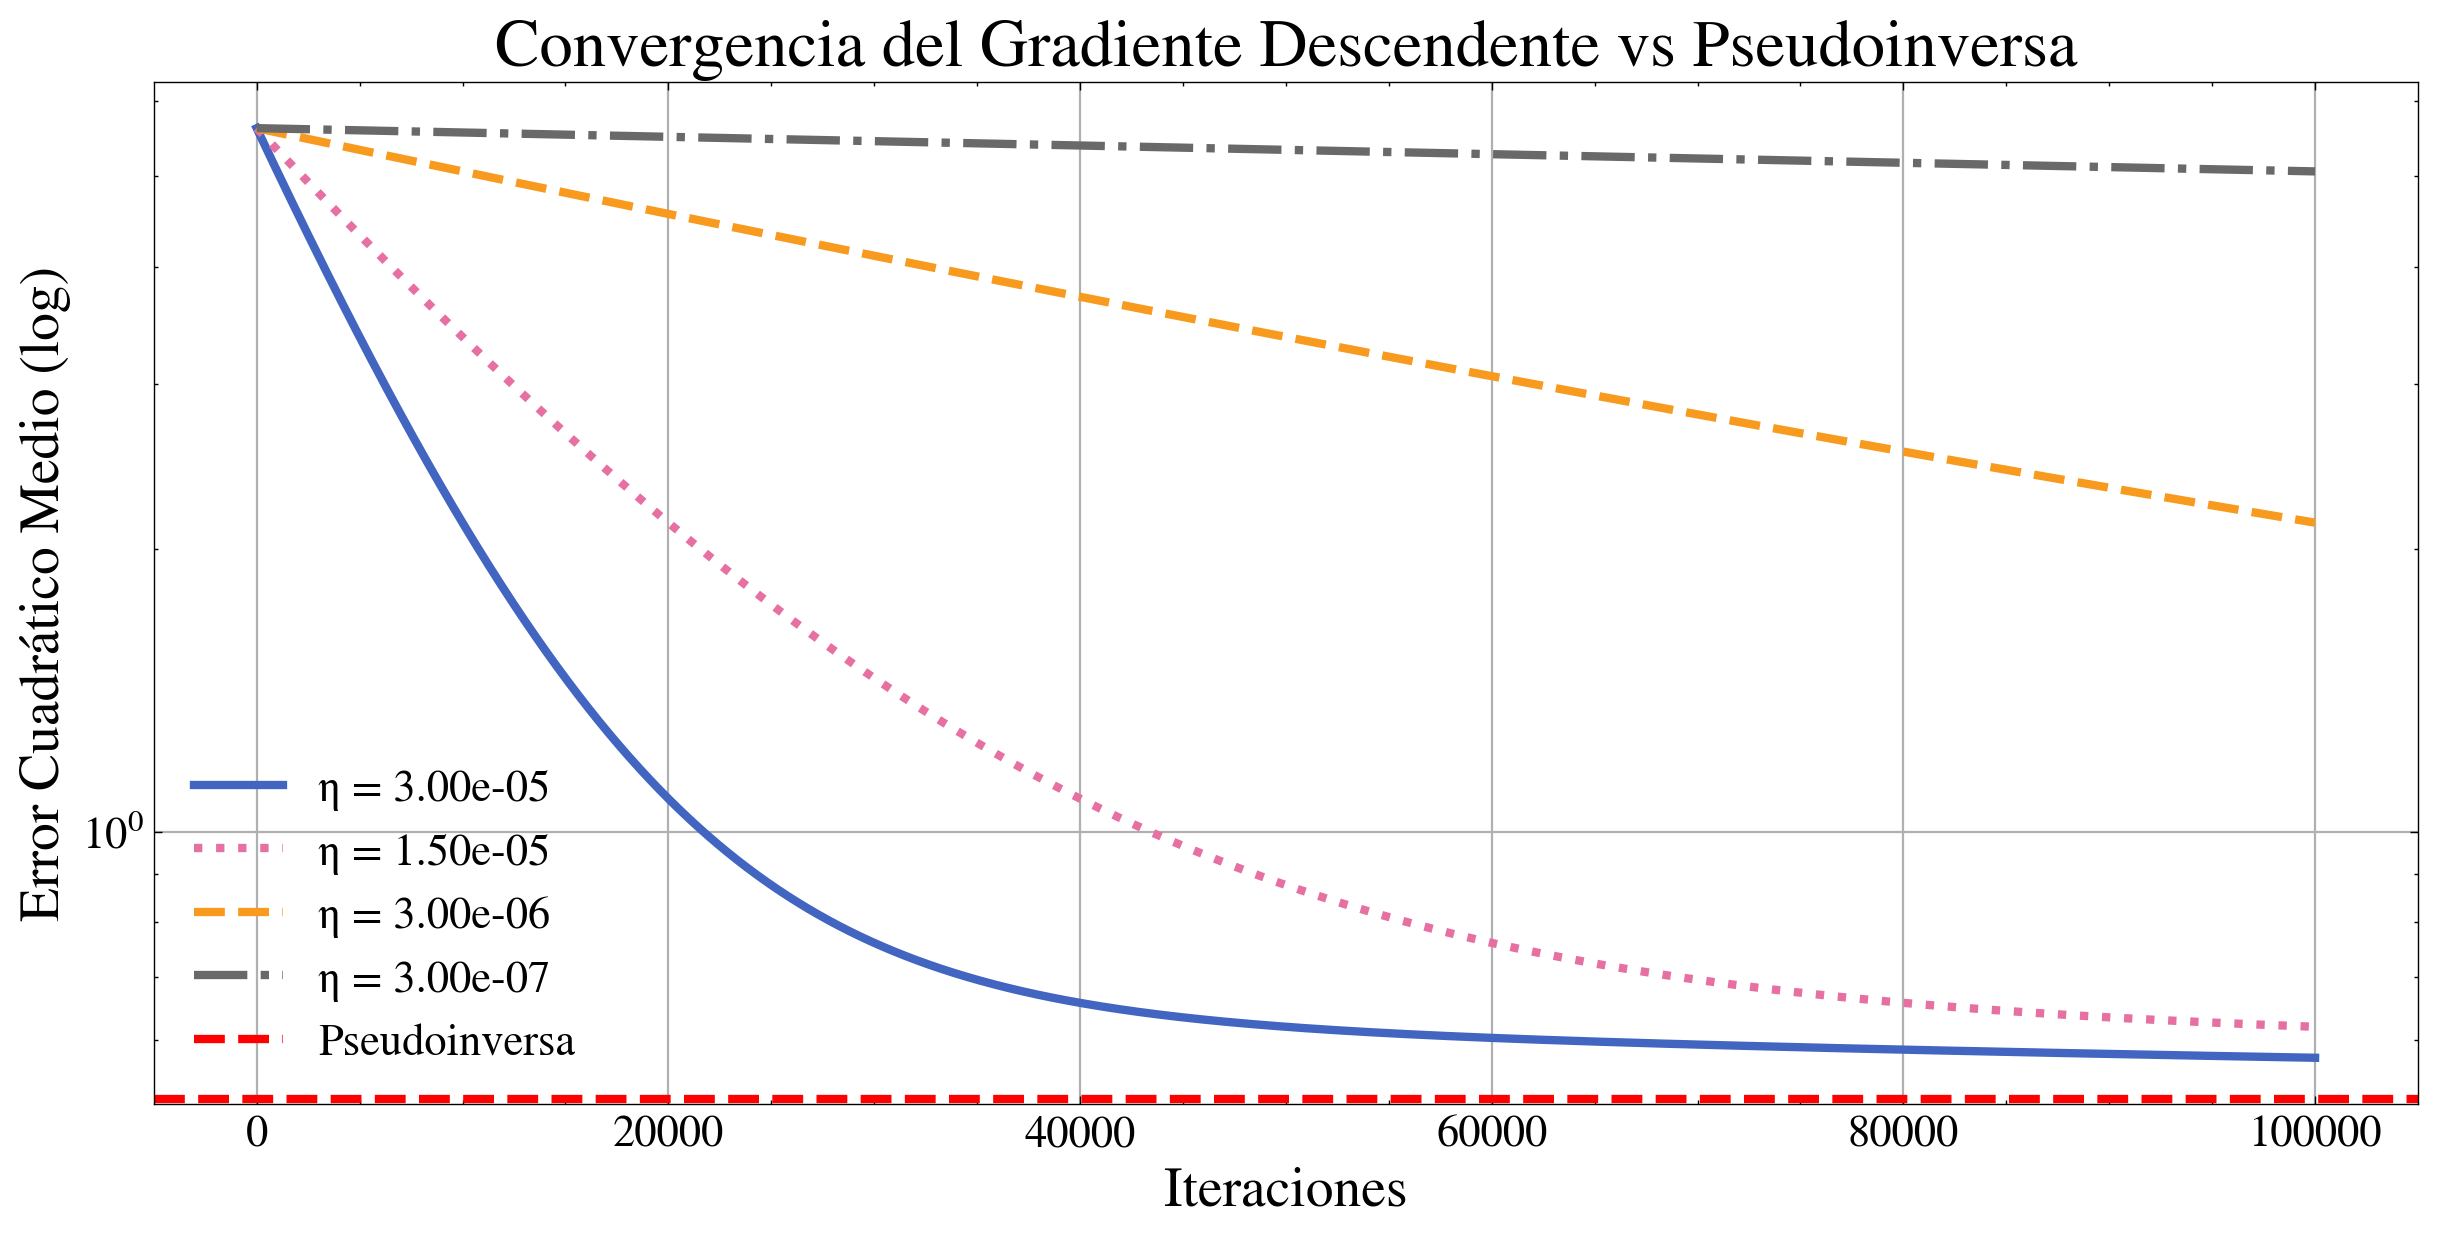

In [10]:
plt.figure(figsize=(12, 6))

for resultado in resultados_gd:
    eta = resultado['eta']
    errors = resultado['historia_error']
    plt.semilogy(errors, label=f'η = {eta:.2e}', linewidth=3)

plt.axhline(y=mse_train, color='r', linestyle='--', label='Pseudoinversa', linewidth=3)
plt.xlabel('Iteraciones', fontsize=20)
plt.ylabel('Error Cuadrático Medio (log)', fontsize=20)
plt.title('Convergencia del Gradiente Descendente vs Pseudoinversa', fontsize=24)
plt.legend(fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('../Figures/convergencia.png')
plt.show()

In [11]:
resultados_comparacion = pd.DataFrame({
    'Método': ['Pseudoinversa'] + [f'GD (η={res["eta"]:.2e})' for res in resultados_gd],
    'MSE Train': [mse_train] + [mse(y_train, X_train_scaled.dot(res['w_final'])) 
                               for res in resultados_gd],
    'MSE Test': [mse_test] + [mse(y_test, X_test_scaled.dot(res['w_final'])) 
                             for res in resultados_gd],
    'Iteraciones': [1] + [len(res['historia_error']) for res in resultados_gd]
})

print("\nComparación de métodos:")
print(resultados_comparacion.to_string(index=False))


Comparación de métodos:
         Método  MSE Train  MSE Test  Iteraciones
  Pseudoinversa   0.519372  0.551437            1
GD (η=3.00e-05)   0.574015  0.588683       100000
GD (η=1.50e-05)   0.619370  0.635283       100000
GD (η=3.00e-06)   2.134062  2.142178       100000
GD (η=3.00e-07)   5.053412  5.018803       100000


/tmp/ipykernel_176533/2238293188.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


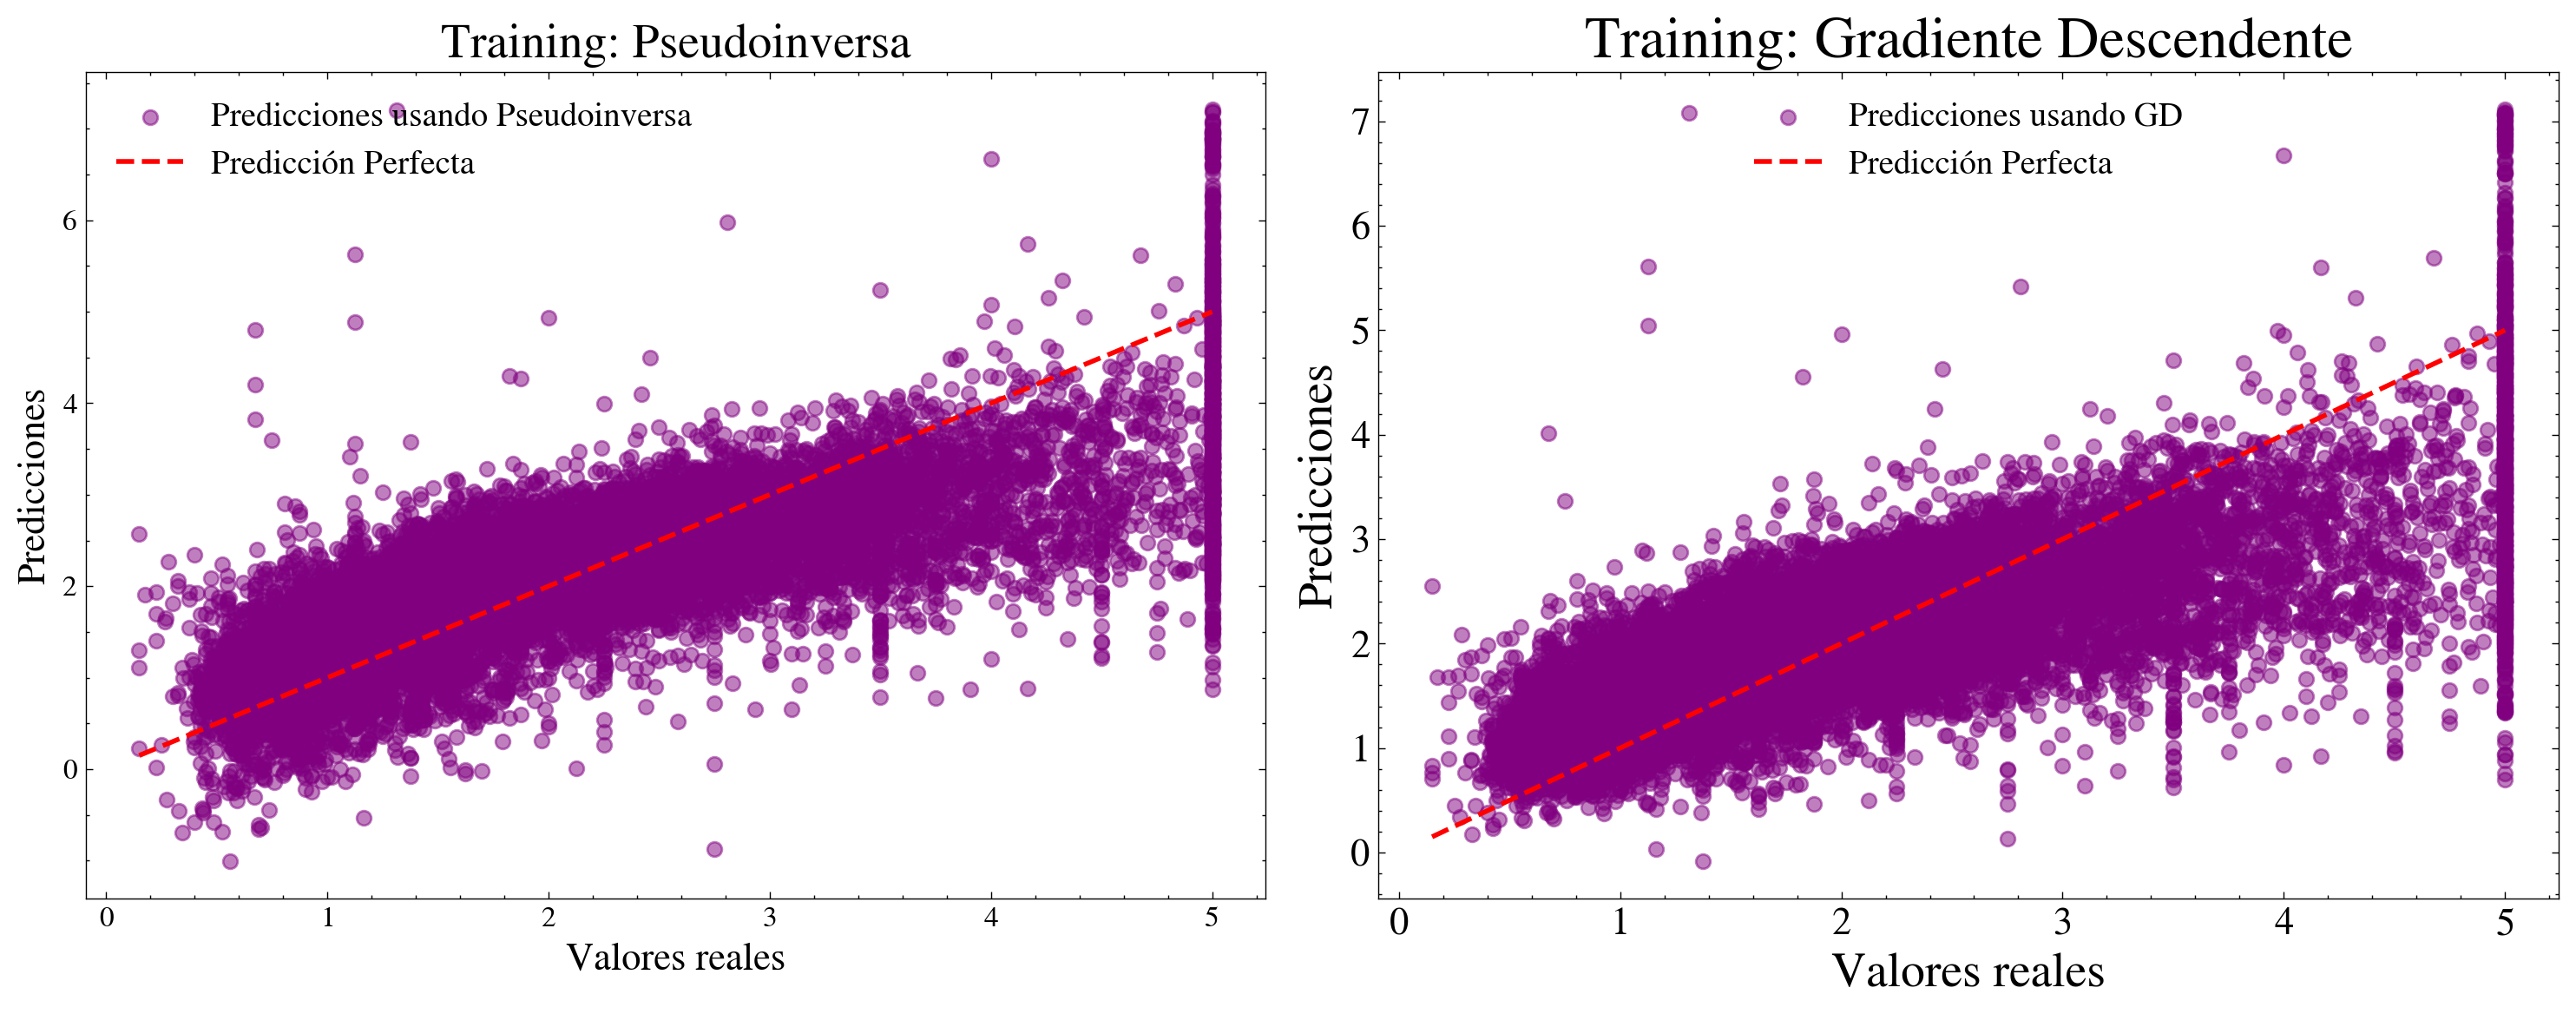

/tmp/ipykernel_176533/2238293188.py:66: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


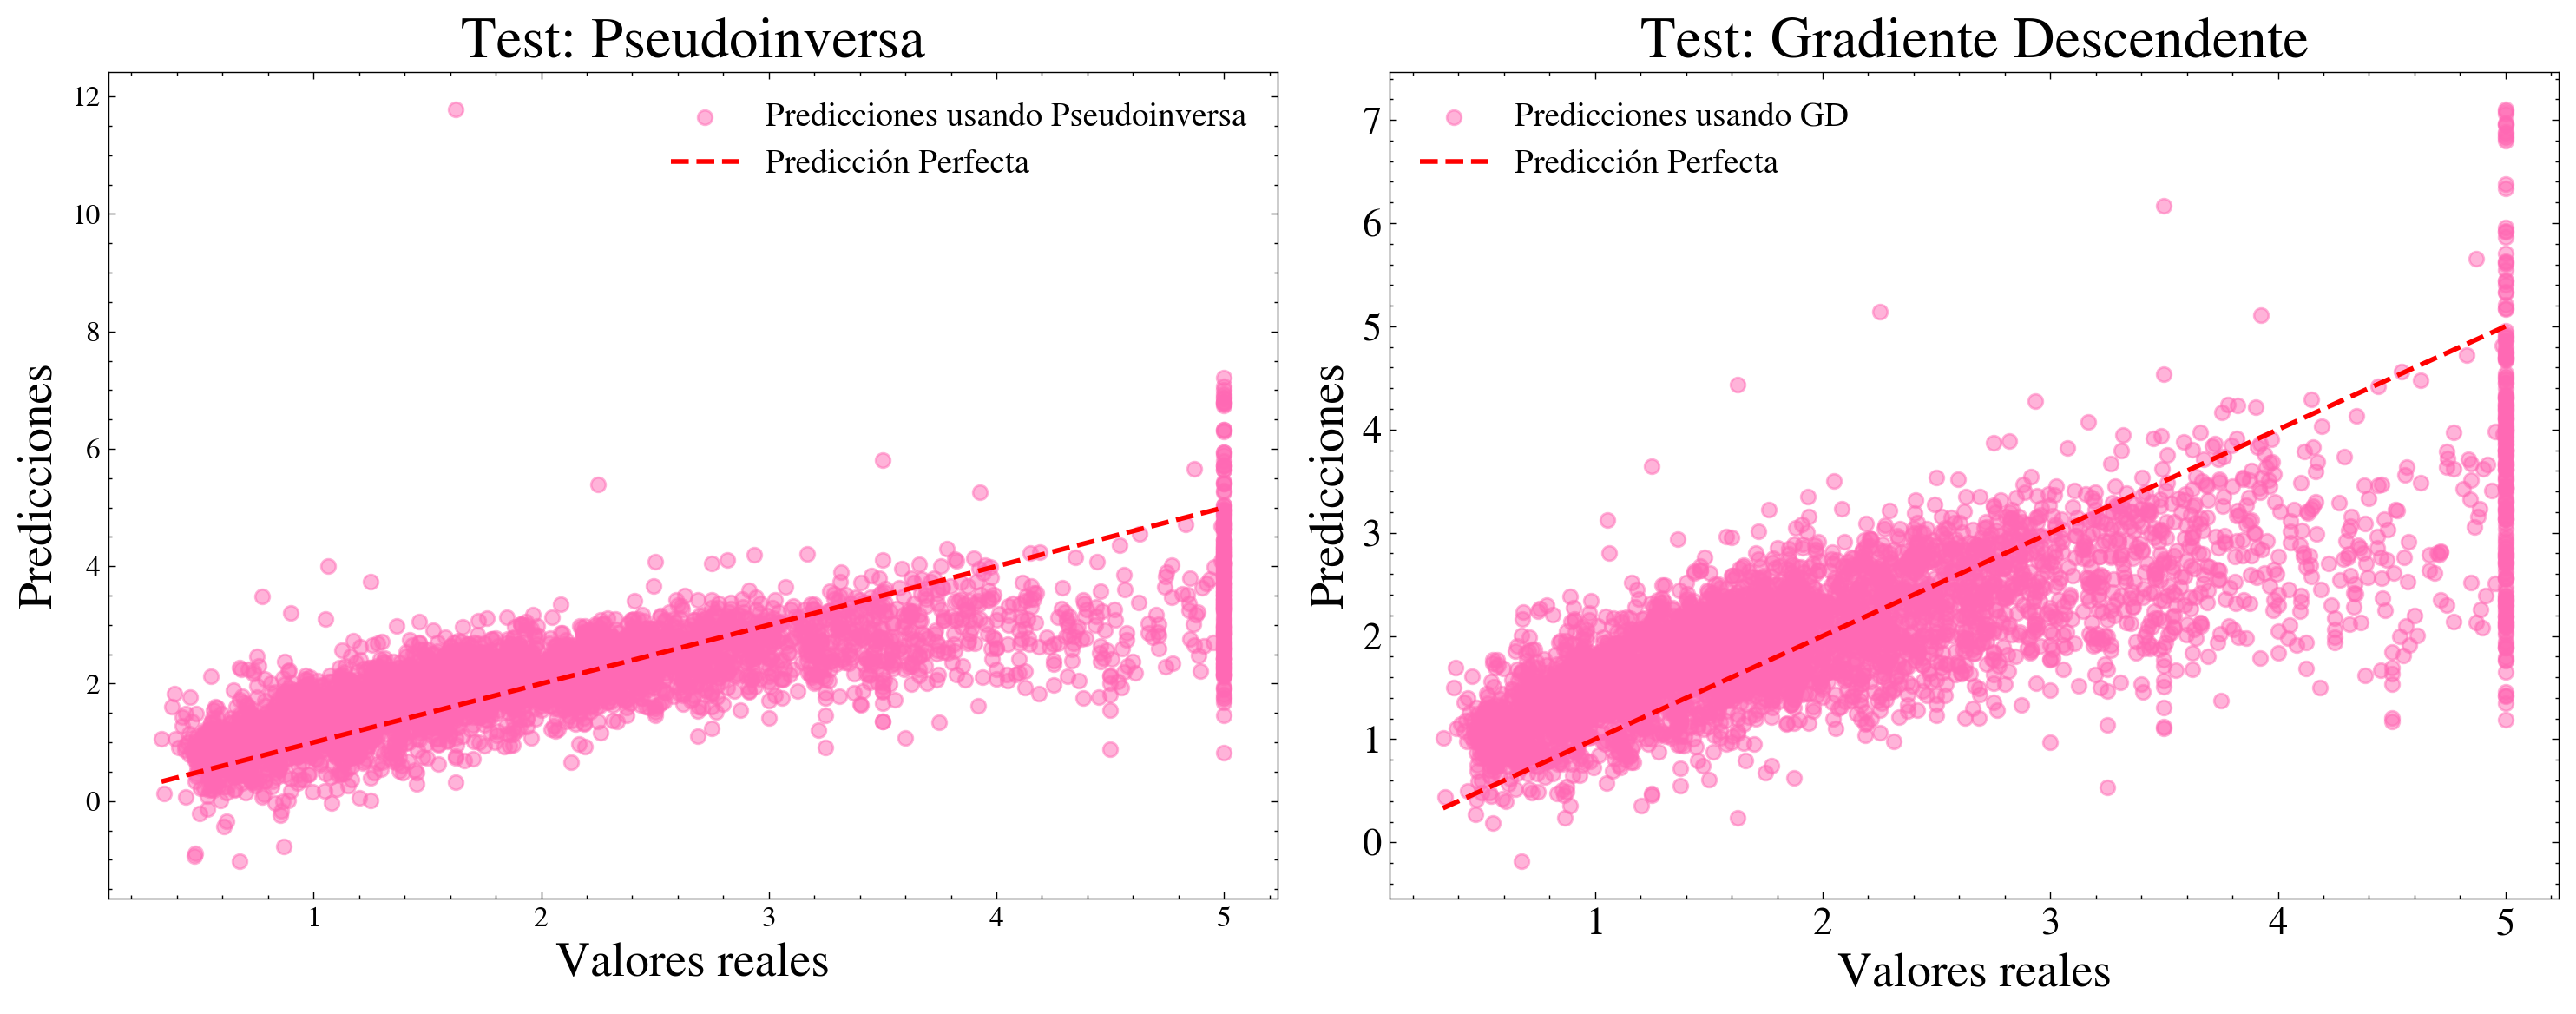

In [12]:
mejor_gd = resultados_gd[np.argmin([mse(y_test, X_test_scaled.dot(res['w_final'])) 
                                   for res in resultados_gd])]

# Predicciones
y_pred_gd_train = X_train_scaled.dot(mejor_gd['w_final'])
y_pred_gd_test = X_test_scaled.dot(mejor_gd['w_final'])

# Gráfico para el conjunto de entrenamiento
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set - Pseudoinversa
axes[0].scatter(y_train, y_pred_train, alpha=0.5, 
               label='Predicciones usando Pseudoinversa', color='purple')
axes[0].plot([y_train.min(), y_train.max()], 
            [y_train.min(), y_train.max()], 'r--', 
            lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('Valores reales', fontsize=16)
axes[0].set_ylabel('Predicciones', fontsize=16)
axes[0].set_title('Training: Pseudoinversa', fontsize=20)
axes[0].legend(fontsize=14)

# Training set - Gradiente Descendente  
axes[1].scatter(y_train, y_pred_gd_train, alpha=0.5,
               label='Predicciones usando GD', color='purple')
axes[1].plot([y_train.min(), y_train.max()], 
            [y_train.min(), y_train.max()], 'r--',
            lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('Valores reales', fontsize=20)
axes[1].set_ylabel('Predicciones', fontsize=20)
axes[1].set_title('Training: Gradiente Descendente', fontsize=24)
axes[1].legend(fontsize=14)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('../Figures/conjuntoEntrenamiento.png')
plt.show()

# Gráfico para el conjunto de test
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Test set - Pseudoinversa
axes[0].scatter(y_test, y_pred_test, alpha=0.5, 
               label='Predicciones usando Pseudoinversa', color='hotpink')
axes[0].plot([y_test.min(), y_test.max()], 
            [y_test.min(), y_test.max()], 'r--',
            lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('Valores reales', fontsize=20)
axes[0].set_ylabel('Predicciones', fontsize=20)
axes[0].set_title('Test: Pseudoinversa', fontsize=24)
axes[0].legend(fontsize=14)

# Test set - Gradiente Descendente
axes[1].scatter(y_test, y_pred_gd_test, alpha=0.5,
               label='Predicciones usando GD', color='hotpink')
axes[1].plot([y_test.min(), y_test.max()], 
            [y_test.min(), y_test.max()], 'r--',
            lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('Valores reales', fontsize=20)
axes[1].set_ylabel('Predicciones', fontsize=20)
axes[1].set_title('Test: Gradiente Descendente', fontsize=24)
axes[1].legend(fontsize=14)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('../Figures/conjuntoTest.png')
plt.show()

# Gradiente descendete Estocástico y Momento

In [13]:
X_train_numpy = np.array(X_train_scaled)
y_train_numpy = np.array(y_train)
X_test_numpy = np.array(X_test_scaled)
y_test_numpy = np.array(y_test)

sigma_1 = np.linalg.svd(X_train_numpy, compute_uv=False)[0]
eta_optimo = 1/sigma_1**2

batch_sizes = [32, 64, 128]
sgd_results = []

betas = [0.9, 0.95, 0.99]
momentum_results = []

for beta in betas:
    w_mom, w_history_mom, train_errors_mom, msg = momentum_regresion(
        X_train_numpy, y_train_numpy,
        eta=eta_optimo,
        beta=beta
    )
    momentum_results.append({
        'beta': beta,
        'w_final': w_mom,
        'historia_error': train_errors_mom,
        'mensaje': msg
    })

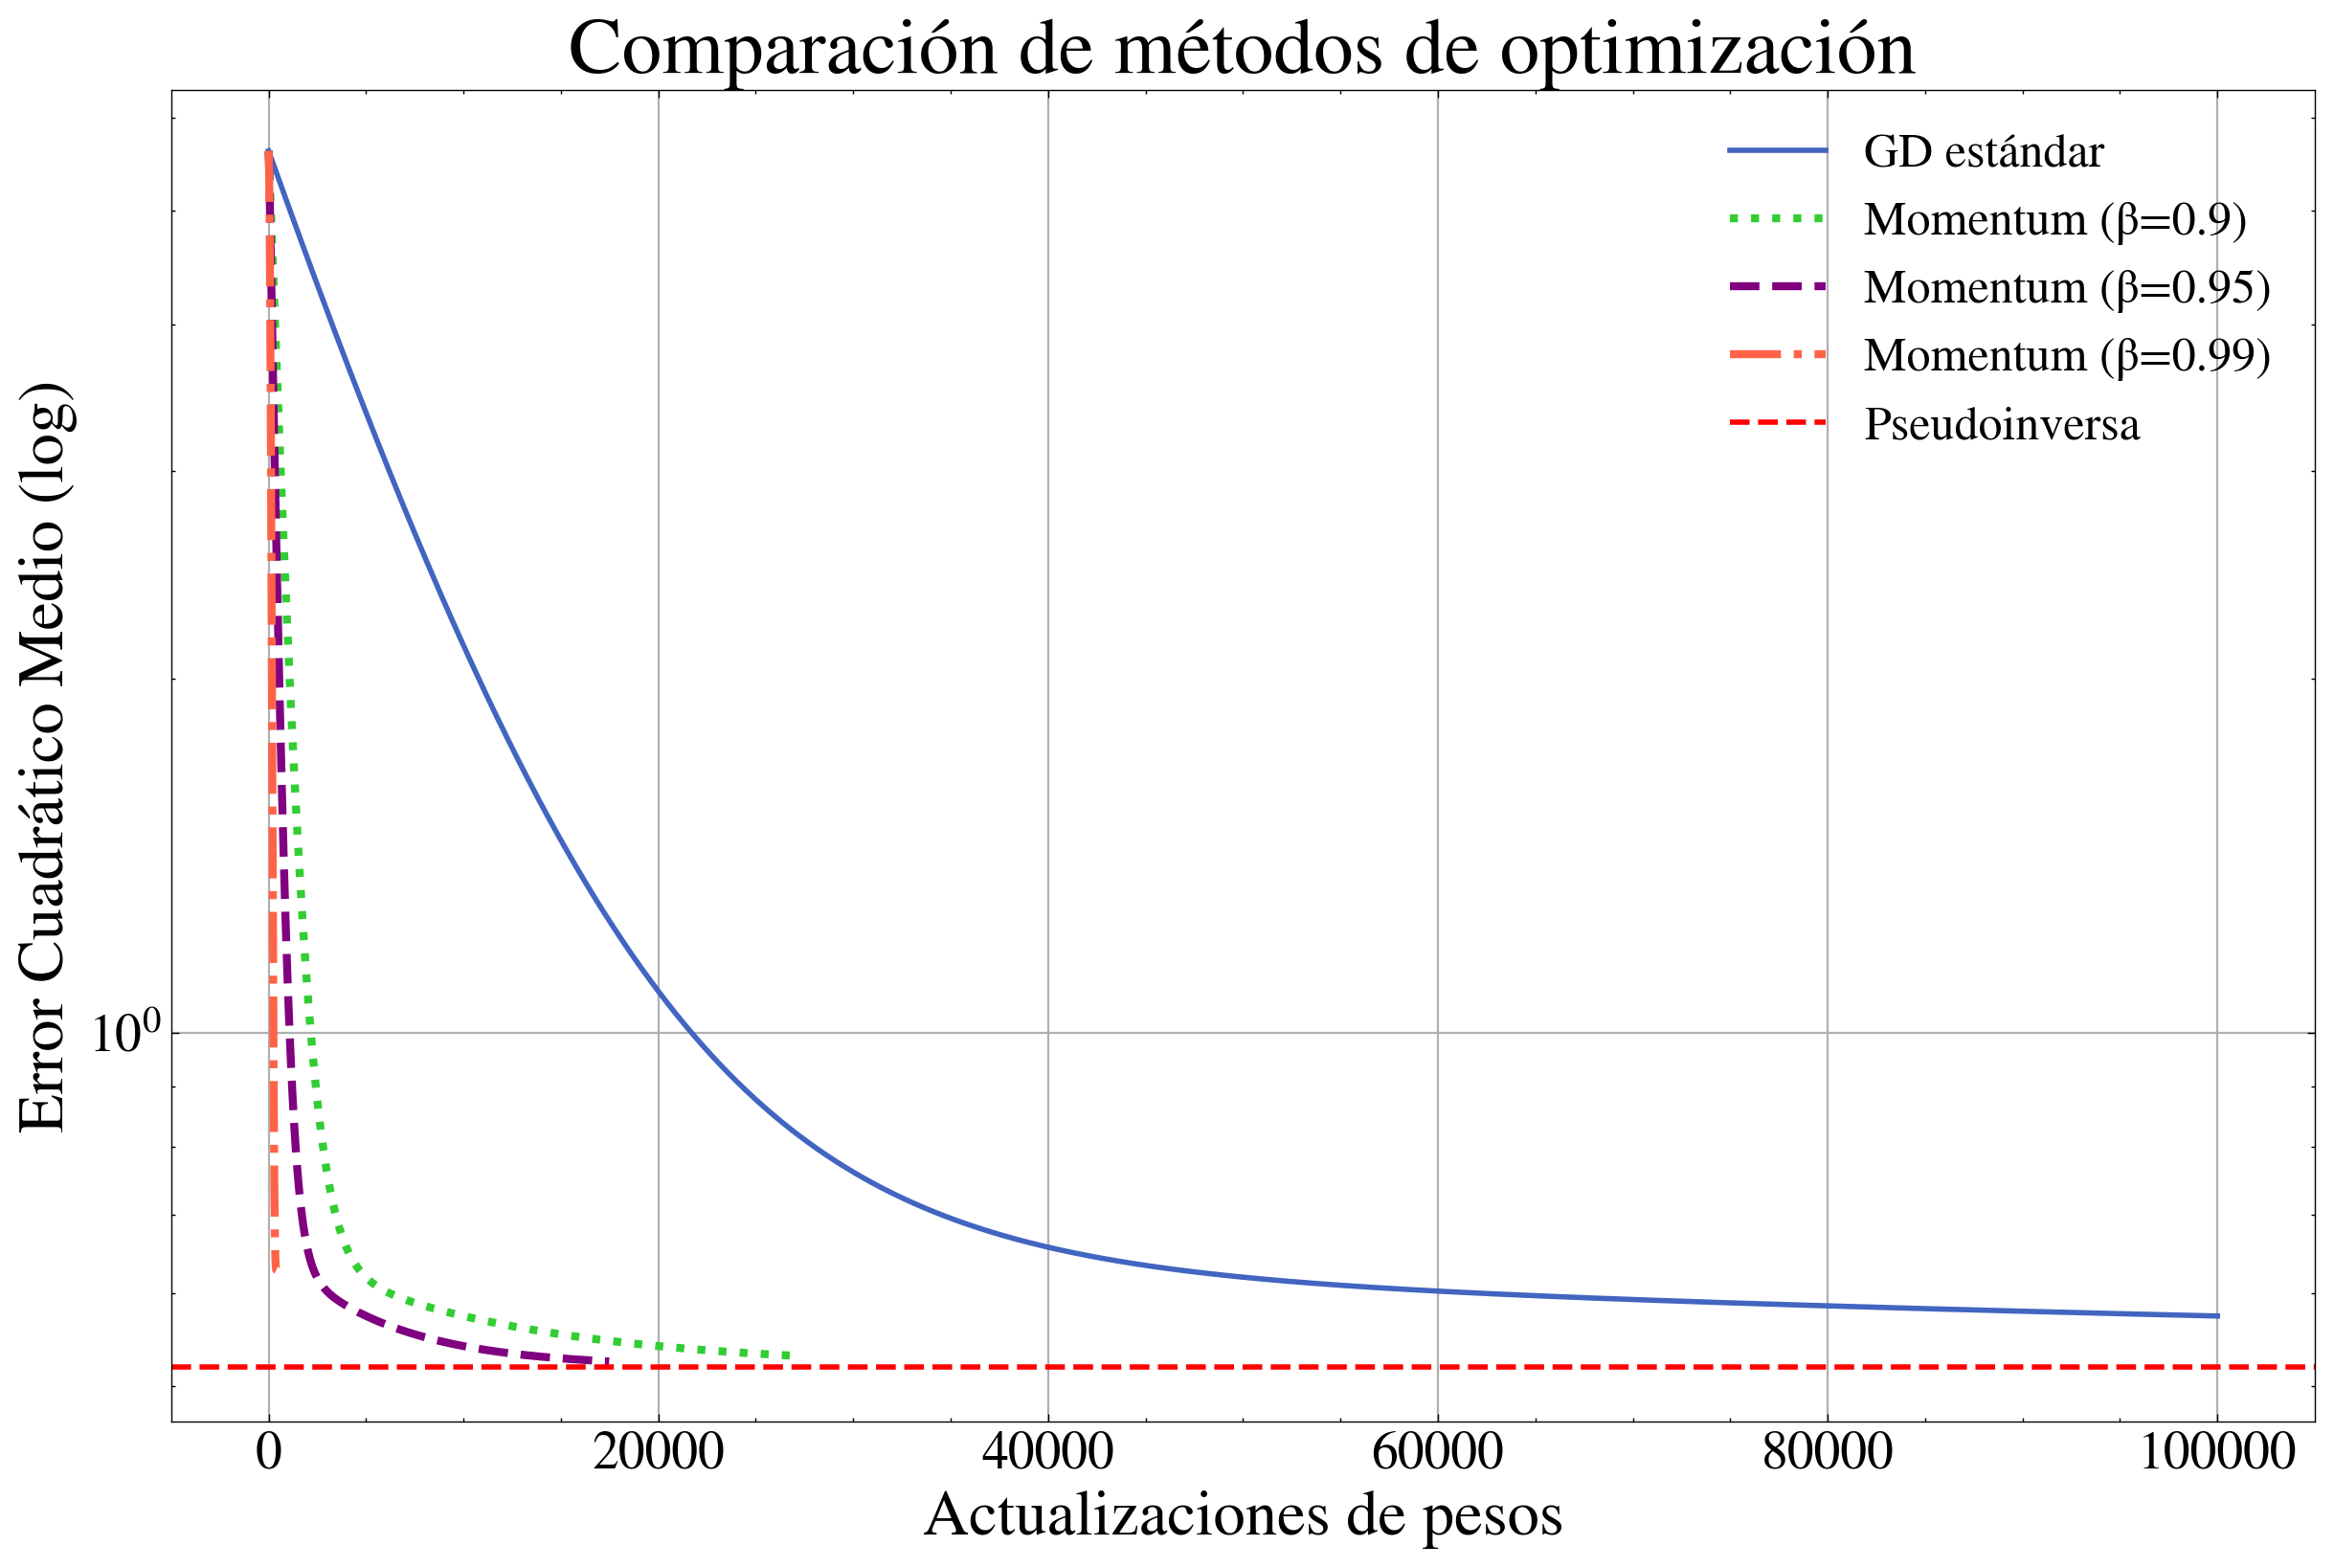

In [14]:
plt.figure(figsize=(12, 8))
colors = ['#32CD32', '#800080', '#FF6347']

# GD estándar
plt.semilogy(resultados_gd[0]['historia_error'], 
             label='GD estándar', alpha=1, linewidth=2)

# Momentum
for i, resultado in enumerate(momentum_results):
    plt.semilogy(resultado['historia_error'], 
                 label=f'Momentum (β={resultado["beta"]})', 
                 alpha=1, linewidth=3, color=colors[i % len(colors)])

# Pseudoinversa
plt.axhline(y=mse_train, color='r', linestyle='--', label='Pseudoinversa', linewidth=2)

plt.xlabel('Actualizaciones de pesos', fontsize=24)  # Cambiamos el nombre del eje x
plt.ylabel('Error Cuadrático Medio (log)', fontsize=24)
plt.title('Comparación de métodos de optimización', fontsize=30)
plt.legend(fontsize=18, loc='best')
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('../Figures/comparacion_momentum.png')
plt.show()

In [15]:
resultados_comparacion = pd.DataFrame({
    'Método': ['Pseudoinversa', 'GD estándar'] + 
             [f'SGD (batch={res["batch_size"]})' for res in sgd_results] +
             [f'Momentum (β={res["beta"]})' for res in momentum_results],
    'MSE Train': [mse_train] + [mse_train] + 
                [mse(y_train, X_train_scaled.dot(res['w_final'])) 
                 for res in sgd_results + momentum_results],
    'MSE Test': [mse_test] + [mse_test] + 
               [mse(y_test, X_test_scaled.dot(res['w_final'])) 
                for res in sgd_results + momentum_results],
    'Iteraciones': [1, 100000] + 
                   [len(res['historia_error']) for res in sgd_results] +
                   [len(res['historia_error']) for res in momentum_results]
})

print("\nComparación de métodos:")
print(resultados_comparacion.to_string(index=False))


Comparación de métodos:
           Método  MSE Train  MSE Test  Iteraciones
    Pseudoinversa   0.519372  0.551437            1
      GD estándar   0.519372  0.551437       100000
 Momentum (β=0.9)   0.530718  0.553414        27331
Momentum (β=0.95)   0.525219  0.551002        17476
Momentum (β=0.99)   0.628089  0.644228          397


In [16]:
# Probemos momentum con beta=0.99 y veamos dónde falla
w_mom, w_history_mom, train_errors_mom, msg = momentum_regresion(
    X_train_numpy, y_train_numpy,
    eta=eta_optimo,
    beta=0.99,
    max_iter=10000
)

print(f"Mensaje de finalización: {msg}")
print(f"Número de iteraciones completadas: {len(train_errors_mom)}")

Mensaje de finalización: Convergencia por error en iter 396
Número de iteraciones completadas: 397


# Extra regularización

In [17]:
# Valores de lambda a probar
lambdas = [0, 1e-4, 1e-2, 1, 10]

# Resultados para solución exacta
ridge_exact_results = []
for lambda_ in lambdas:
    w_exact = ridge_exacta(X_train_numpy, y_train_numpy, lambda_)
    train_error = ridge_mse(y_train_numpy, X_train_numpy.dot(w_exact), w_exact, lambda_)
    test_error = ridge_mse(y_test_numpy, X_test_numpy.dot(w_exact), w_exact, lambda_)
    
    ridge_exact_results.append({
        'lambda': lambda_,
        'w': w_exact,
        'train_error': train_error,
        'test_error': test_error
    })

# Resultados para gradiente descendente
ridge_gd_results = []
for lambda_ in lambdas:
    w_gd, w_history, train_errors, msg = ridge_gradiente_descendente(
        X_train_numpy, y_train_numpy, 
        lambda_=lambda_,
        eta=eta_optimo
    )
    test_error = ridge_mse(y_test_numpy, X_test_numpy.dot(w_gd), w_gd, lambda_)
    
    ridge_gd_results.append({
        'lambda': lambda_,
        'w': w_gd,
        'historia_error': train_errors,
        'test_error': test_error,
        'mensaje': msg
    })

/tmp/ipykernel_176533/2507436117.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


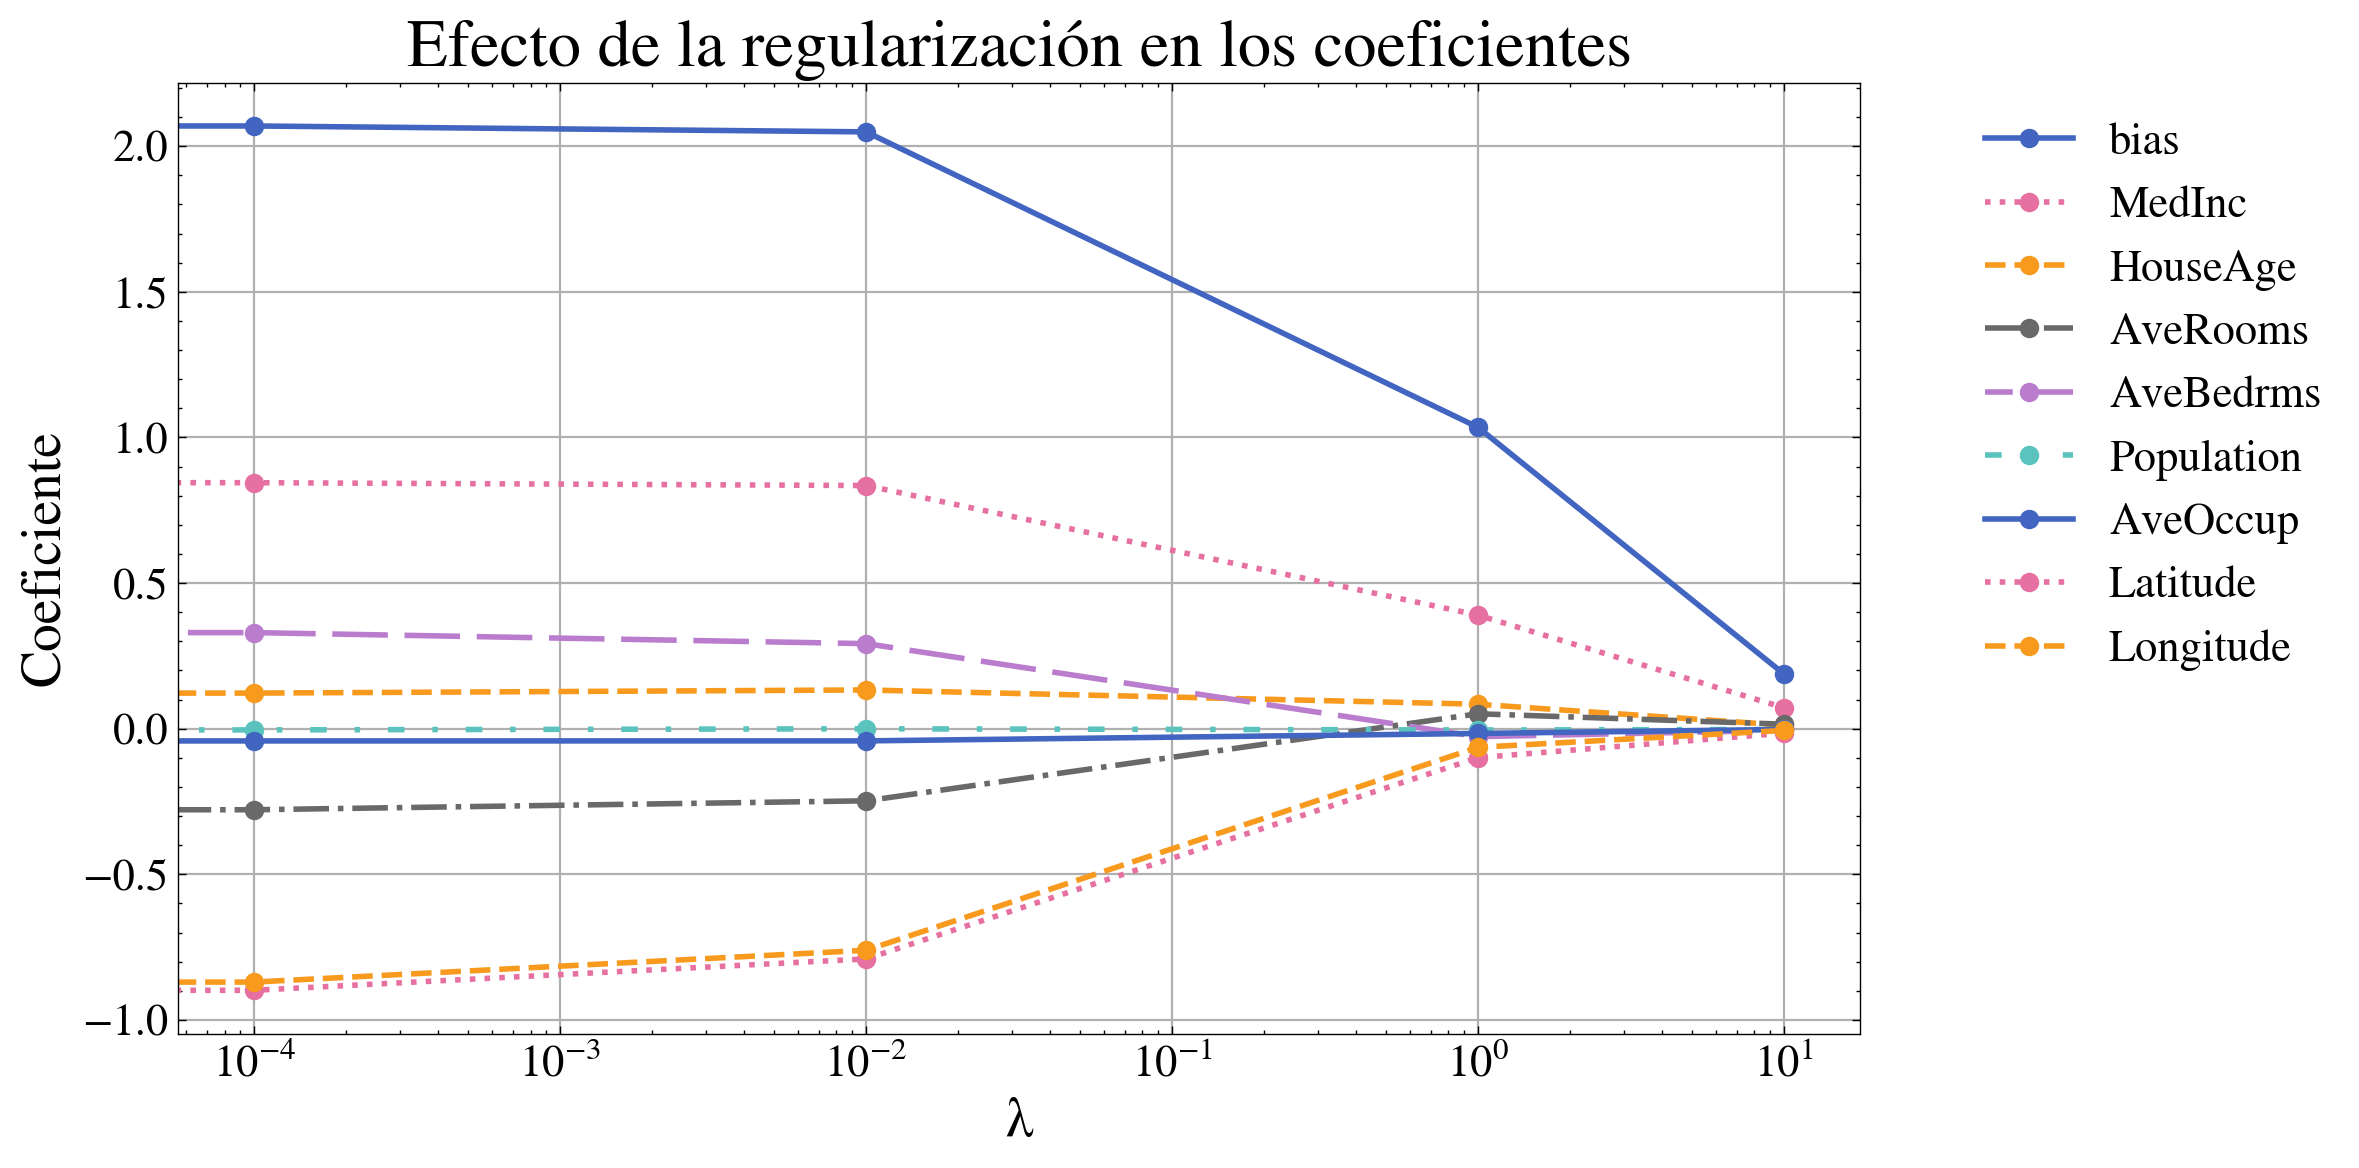

In [18]:
plt.figure(figsize=(12, 6))

# Preparamos los datos
coef_data = []
feature_names = ['bias'] + list(housing.feature_names)
for res in ridge_exact_results:
    coef_data.append(res['w'])

coef_data = np.array(coef_data)

# Graficamos
for i, feature in enumerate(feature_names):
    plt.plot([res['lambda'] for res in ridge_exact_results], coef_data[:, i], 
             marker='o', label=feature, linewidth=2)

plt.xscale('log')
plt.xlabel('λ', fontsize=20)
plt.ylabel('Coeficiente', fontsize=20)
plt.title('Efecto de la regularización en los coeficientes', fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('../Figures/regularizacion_coeficientes.png', dpi= 600)
plt.show()


Resultados de comparación:
                Método  MSE Train  MSE Test  Norma de w
SVD sin regularización   0.519372  0.551437    2.601694
SVD con regularización   2.712448  2.711916    0.790151
 GD sin regularización   0.574015  0.588683    2.274845
 GD con regularización   2.729342  2.728651    0.784309

Mensaje de convergencia Ridge GD: Convergencia en iter 29017


/tmp/ipykernel_176533/762816566.py:88: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


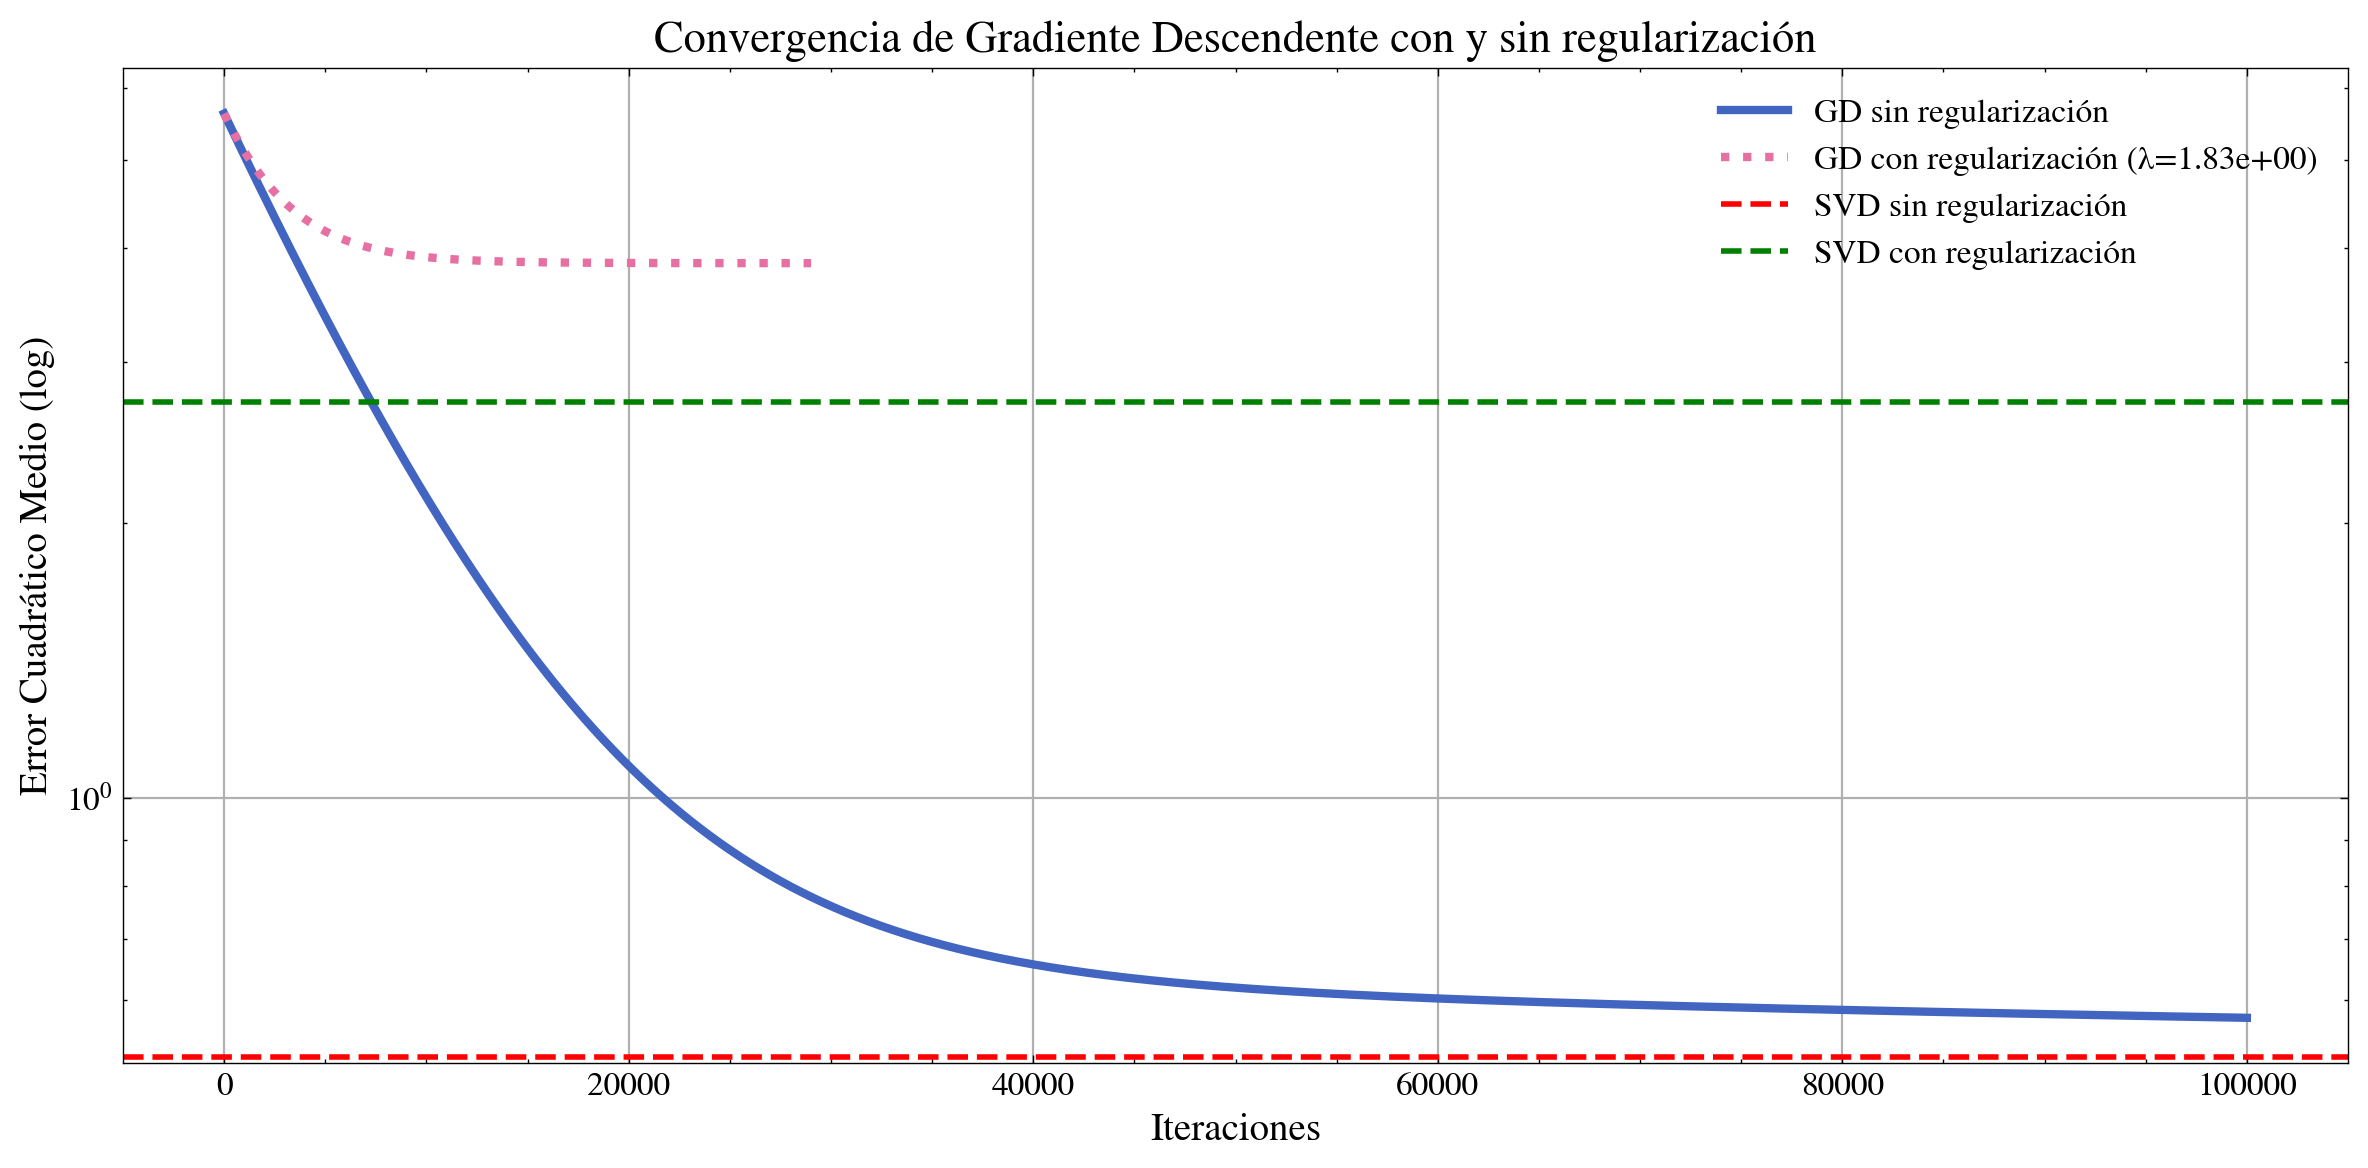

1.8258115649462414


In [19]:
# Calculamos lambda según la sugerencia del enunciado
lambda_ = 1e-2 * sigma_1

# 1. Solución exacta sin regularización (ya la tenemos como w_opt)
y_pred_train_opt = X_train_scaled.dot(w_opt)
y_pred_test_opt = X_test_scaled.dot(w_opt)

# 2. Solución exacta con regularización
w_ridge = ridge_exacta(X_train_scaled, y_train, lambda_)
y_pred_train_ridge = X_train_scaled.dot(w_ridge)
y_pred_test_ridge = X_test_scaled.dot(w_ridge)

# 3. Gradiente descendente sin regularización (ya lo tenemos)
w_gd = resultados_gd[0]['w_final']  # usando el primer eta (óptimo)
y_pred_train_gd = X_train_scaled.dot(w_gd)
y_pred_test_gd = X_test_scaled.dot(w_gd)

# 4. Gradiente descendente con regularización
w_ridge_gd, w_history_ridge, errors_ridge, mensaje = ridge_gradiente_descendente(
    X_train_scaled, y_train, lambda_, eta_optimo
)
y_pred_train_ridge_gd = X_train_scaled.dot(w_ridge_gd)
y_pred_test_ridge_gd = X_test_scaled.dot(w_ridge_gd)

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Método': ['SVD sin regularización', 
               'SVD con regularización', 
               'GD sin regularización',
               'GD con regularización'],
    'MSE Train': [
        mse(y_train, y_pred_train_opt),
        mse(y_train, y_pred_train_ridge),
        mse(y_train, y_pred_train_gd),
        mse(y_train, y_pred_train_ridge_gd)
    ],
    'MSE Test': [
        mse(y_test, y_pred_test_opt),
        mse(y_test, y_pred_test_ridge),
        mse(y_test, y_pred_test_gd),
        mse(y_test, y_pred_test_ridge_gd)
    ],
    'Norma de w': [
        np.linalg.norm(w_opt),
        np.linalg.norm(w_ridge),
        np.linalg.norm(w_gd),
        np.linalg.norm(w_ridge_gd)
    ]
})

print("\nResultados de comparación:")
print(resultados.to_string(index=False))
print(f"\nMensaje de convergencia Ridge GD: {mensaje}")

# Visualización de la convergencia
plt.figure(figsize=(12, 6))

# GD sin regularización
plt.semilogy(resultados_gd[0]['historia_error'], 
             label='GD sin regularización', 
             linewidth=3)

# GD con regularización
plt.semilogy(errors_ridge, 
             label=f'GD con regularización (λ={lambda_:.2e})', 
             linewidth=3)

# Líneas horizontales para soluciones exactas
plt.axhline(y=resultados['MSE Train'][0], 
            color='r', 
            linestyle='--', 
            label='SVD sin regularización',
            linewidth=2)
plt.axhline(y=resultados['MSE Train'][1], 
            color='g', 
            linestyle='--', 
            label='SVD con regularización',
            linewidth=2)

plt.xlabel('Iteraciones', fontsize=14)
plt.ylabel('Error Cuadrático Medio (log)', fontsize=14)
plt.title('Convergencia de Gradiente Descendente con y sin regularización', 
          fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print(1e-2 * sigma_1)

/tmp/ipykernel_176533/3713075763.py:53: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


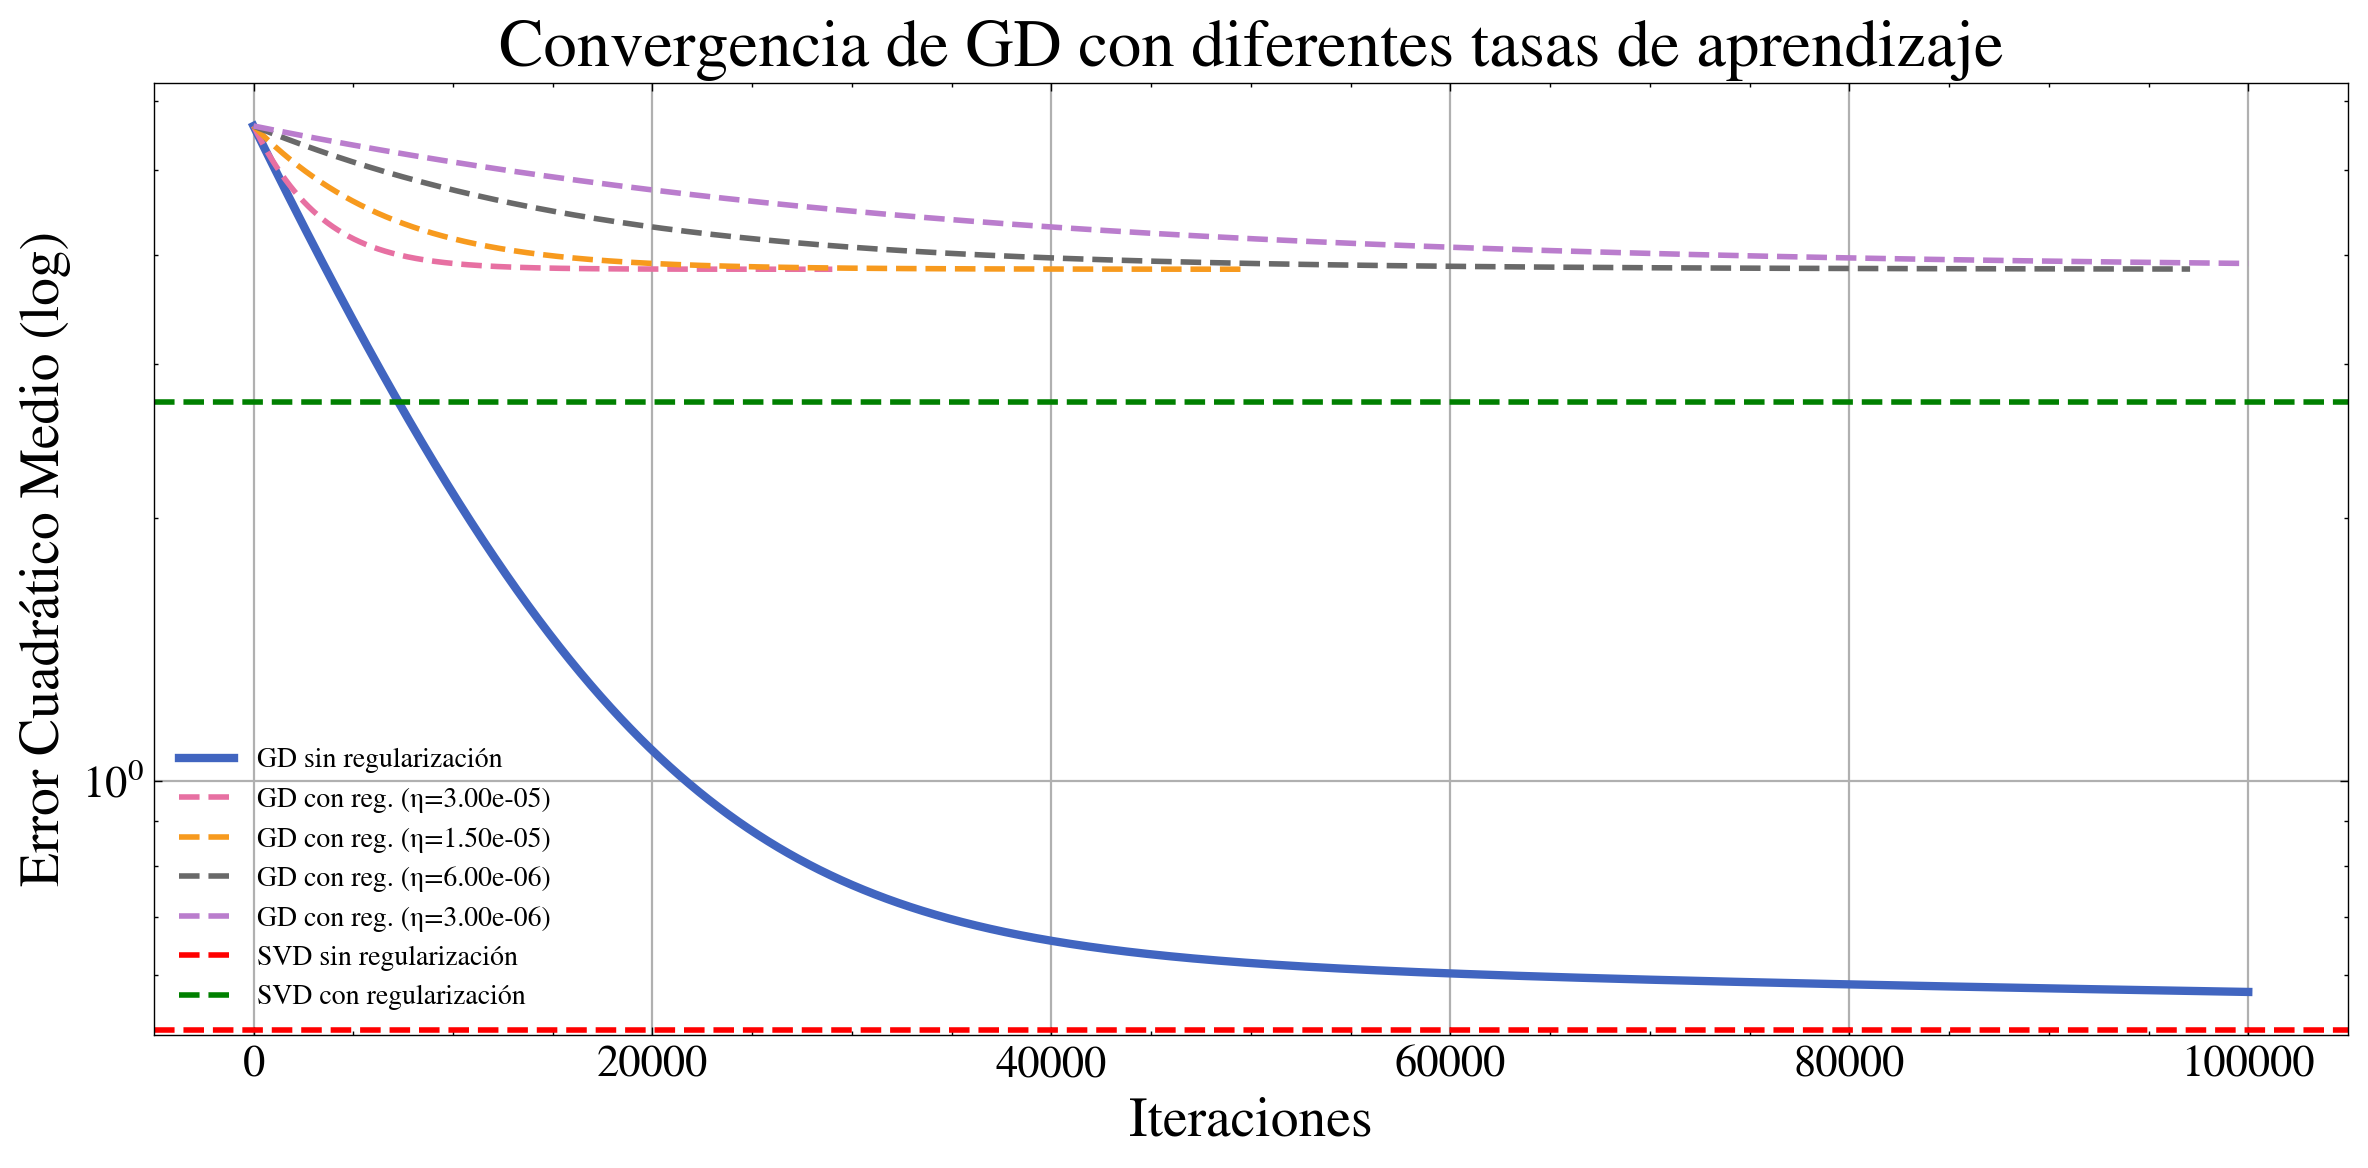


Resultados con diferentes tasas de aprendizaje:
Tasa de aprendizaje  MSE final  Iteraciones                         Mensaje
           3.00e-05   3.852473        29018      Convergencia en iter 29017
           1.50e-05   3.852772        49738      Convergencia en iter 49737
           6.00e-06   3.854853        97083      Convergencia en iter 97082
           3.00e-06   3.911792       100000 Máximo de iteraciones alcanzado


In [20]:
# Probamos diferentes tasas de aprendizaje para el caso regularizado
lambda_ = 1e-2 * sigma_1
etas_ridge = [eta_optimo, eta_optimo/2, eta_optimo/5, eta_optimo/10]

resultados_ridge = []

for eta in etas_ridge:
    w, w_history, errors, msg = ridge_gradiente_descendente(
        X_train_scaled, y_train, lambda_, eta
    )
    resultados_ridge.append({
        'eta': eta,
        'errors': errors,
        'mensaje': msg
    })

# Visualización
plt.figure(figsize=(12, 6))

# GD sin regularización como referencia
plt.semilogy(resultados_gd[0]['historia_error'], 
             label='GD sin regularización', 
             linewidth=3)

# GD con regularización para diferentes etas
for res in resultados_ridge:
    plt.semilogy(res['errors'], 
                 label=f'GD con reg. (η={res["eta"]:.2e})', 
                 linewidth=2,
                 linestyle='--')

# Referencias de SVD
plt.axhline(y=mse(y_train, X_train_scaled.dot(w_opt)), 
            color='r', 
            linestyle='--', 
            label='SVD sin regularización',
            linewidth=2)

plt.axhline(y=mse(y_train, X_train_scaled.dot(ridge_exacta(X_train_scaled, y_train, lambda_))), 
            color='g', 
            linestyle='--', 
            label='SVD con regularización',
            linewidth=2)

plt.xlabel('Iteraciones', fontsize=20)
plt.ylabel('Error Cuadrático Medio (log)', fontsize=20)
plt.title('Convergencia de GD con diferentes tasas de aprendizaje', 
          fontsize=24)
plt.legend(fontsize=10, loc='best')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('../Figures/convergencia_ridge.png')
plt.show()

# Tabla comparativa
resultados_df = pd.DataFrame({
    'Tasa de aprendizaje': [f"{eta:.2e}" for eta in etas_ridge],
    'MSE final': [errors[-1] for res in resultados_ridge for errors in [res['errors']]],
    'Iteraciones': [len(res['errors']) for res in resultados_ridge],
    'Mensaje': [res['mensaje'] for res in resultados_ridge]
})

print("\nResultados con diferentes tasas de aprendizaje:")
print(resultados_df.to_string(index=False))

/tmp/ipykernel_176533/4005847412.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


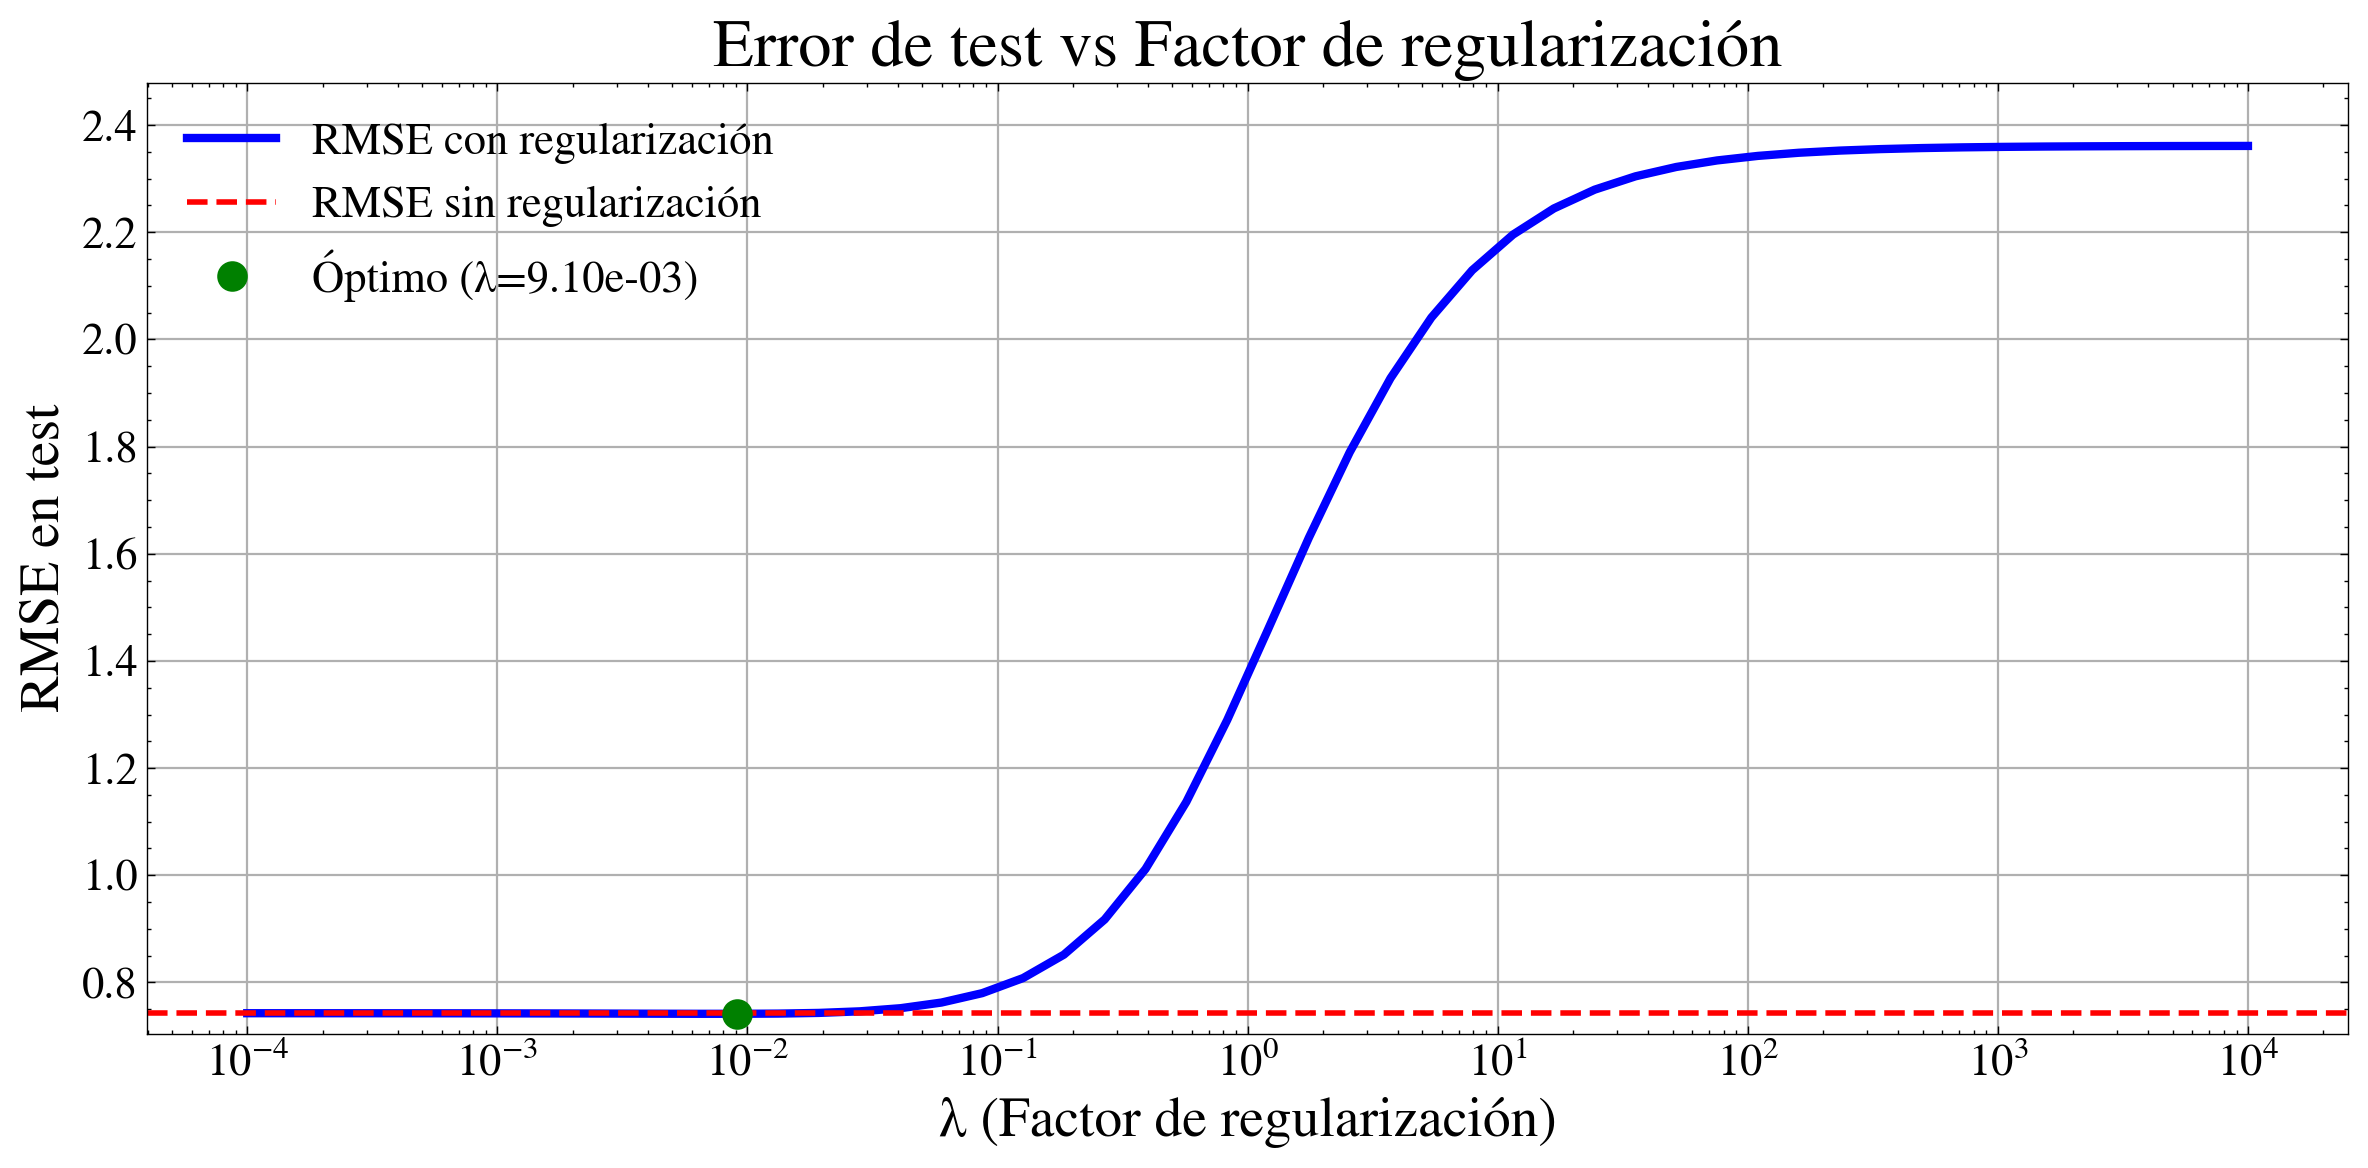


RMSE sin regularización: 0.7426
RMSE óptimo con regularización: 0.7415 (λ = 9.10e-03)


In [21]:
lambdas = np.logspace(-4, 4, 50)  # 50 puntos entre 10^-4 y 10^4
rmse_test_values = []
rmse_base = np.sqrt(mse(y_test, X_test_scaled.dot(w_opt)))

for lambda_ in lambdas:
    w_ridge = ridge_exacta(X_train_scaled, y_train, lambda_)
    y_pred_test = X_test_scaled.dot(w_ridge)
    rmse_test_values.append(np.sqrt(mse(y_test, y_pred_test)))


plt.figure(figsize=(12, 6))
plt.semilogx(lambdas, rmse_test_values, 'b-', linewidth=3, label='RMSE con regularización')
plt.axhline(y=rmse_base, color='r', linestyle='--', 
            linewidth=2, label='RMSE sin regularización')
lambda_opt_idx = np.argmin(rmse_test_values)
lambda_opt = lambdas[lambda_opt_idx]
rmse_opt = rmse_test_values[lambda_opt_idx]
plt.plot(lambda_opt, rmse_opt, 'go', markersize=10, 
         label=f'Óptimo (λ={lambda_opt:.2e})')

plt.xlabel('λ (Factor de regularización)', fontsize=20)
plt.ylabel('RMSE en test', fontsize=20)
plt.title('Error de test vs Factor de regularización', fontsize=24)
plt.grid(True)
plt.legend(fontsize=16)

min_rmse = min(min(rmse_test_values), rmse_base)
max_rmse = max(max(rmse_test_values), rmse_base)
plt.ylim([0.95 * min_rmse, 1.05 * max_rmse])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('../Figures/error_test_regularizacion.png')
plt.show()

print(f"\nRMSE sin regularización: {rmse_base:.4f}")
print(f"RMSE óptimo con regularización: {rmse_opt:.4f} (λ = {lambda_opt:.2e})")